# Torque 2024 - 1 turbine cases

The following analytical wake models are included in FLORIS, foxes, and PyWake.

**Velocity Models**
| Wake Model                        | FLORIS | foxes | PyWake |
| --------------------------------- | ------ | ----- | ------ |
| **Jensen 1983**                   | Y      | Y    | Y (NOJ) |
| **Bastankhah / Porte Agel 2014**  |        | Y    | Y       |
| **Bastankhah / Porte Agel 2016**  | Y      | Y    |         |
| IEA Task 37 Bastankhah            |        |      | Y       |
| Niayifar / Porté-Agel 2016        |        |      | Y       |
| Zong / Porté-Agel 2020            |        |      | Y       |
| Carbajo Fuertes / Markfortt / Porté-Age 2018  |        |      | Y     |
| Blondel and Cathelain 2020        |        |      | Y       |
| Larson 2009                       |        |      | Y       |
| Empirical Gauss                   | Y      |      |         |
| Cumulative Curl                   | Y      |      |         |
| **TurbOPark (Nygaard 2022)**      | Y      | Y    | Y (TurboNOJ) |

**Deflection Models**
| Wake Model                        | FLORIS | foxes | PyWake |
| --------------------------------- | ------ | ----- | ------ |
| **Jimenez**                       | Y      |       | Y      |
| **Bastankhah / Porte Agel 2016**  | Y      | Y     |        |
| Empirical Gauss                   | Y      |       |        |
| Larsen / Hill                     |        |       |   Y    |

In [1]:
# stdlib
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# wcomp
from wcomp import WCompFloris, WCompPyWake, WCompFoxes
from wcomp.plotting import plot_plane

# Constants for all cases. Copy to a particular code block to change, as needed.
CASE_DIR = Path('cases_torque2024/one_turbine')
this_case = CASE_DIR / Path('jensen/wind_energy_system.yaml')
floris_case = WCompFloris(this_case)
ROTOR_D = floris_case.rotor_diameter
XMIN = -1 * ROTOR_D
XMAX = 20 * ROTOR_D
YMIN = -2 * ROTOR_D
YMAX =  2 * ROTOR_D

SAVE_FIGS = False
SAVE_PATH = Path('figures')
if SAVE_FIGS:
    SAVE_PATH.mkdir(exist_ok=True)

## Case Layout

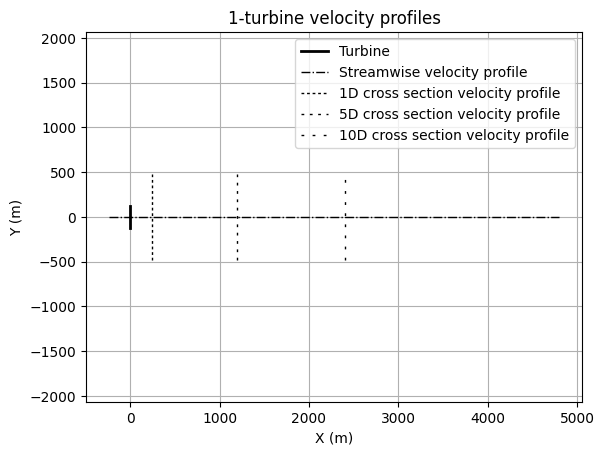

In [2]:
x_turbine = np.array([0.0, 0.0])
y_turbine = np.array([-ROTOR_D/2, ROTOR_D/2])
x_streamwise = np.array([XMIN, XMAX])
y_streamwise = np.array([0.0, 0.0])
x_1d = np.array([1 * ROTOR_D, 1 * ROTOR_D])
x_5d = np.array([5 * ROTOR_D, 5 * ROTOR_D])
x_10d = np.array([10 * ROTOR_D, 10 * ROTOR_D])
y_crosswise = np.array([YMIN, YMAX])
fig, ax = plt.subplots()
ax.plot(x_turbine, y_turbine, '-', color='black', linewidth=2, label="Turbine")
ax.plot(x_streamwise, y_streamwise, '-.', color='black', linewidth=1, label="Streamwise velocity profile")
ax.plot(x_1d, y_crosswise, linestyle=(0, (2, 2)), color='black', linewidth=1, label="1D cross section velocity profile")
ax.plot(x_5d, y_crosswise, linestyle=(0, (2, 4)), color='black', linewidth=1, label="5D cross section velocity profile")
ax.plot(x_10d, y_crosswise, linestyle=(0, (2, 6)), color='black', linewidth=1, label="10D cross section velocity profile")
ax.set_title("1-turbine velocity profiles")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.axis('equal')
ax.grid()
ax.legend()

if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('1t config.png'))

## Velocity models

### Jensen

This is the Jensen model as described in the paper:
A note on wind generator interaction (1983)
https://backend.orbit.dtu.dk/ws/portalfiles/portal/55857682/ris_m_2411.pdf

There, the wake width is given as 0.1 on pages 6 and 8.
PyWake has 0.1 as default
FLORIS has 0.05 as default, but it is changed to 0.1 here.
foxes has a set of predefined Jensen wake models available, but you are expected to create your own, as needed. That is done here with k=0.1.

Implemented in: FLORIS, foxes, PyWake

Turbine 0, T0: windio_turbine
Error norm:
0.0004949684635964407
0.16294393282215525


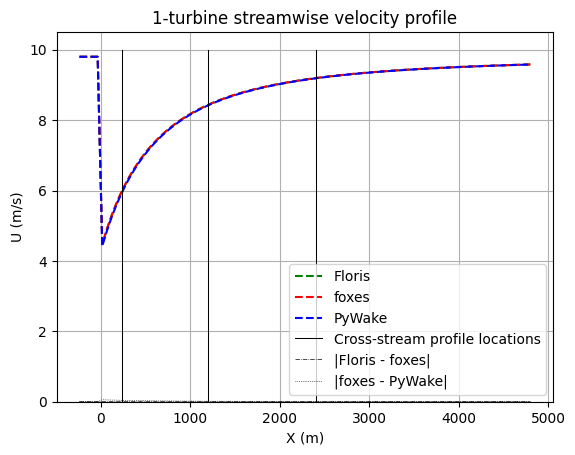

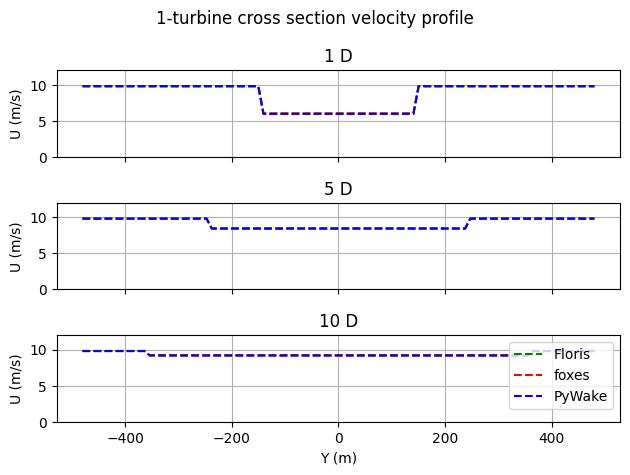

In [3]:
this_case = CASE_DIR / Path('jensen/wind_energy_system.yaml')
floris_case = WCompFloris(this_case)
foxes_case = WCompFoxes(this_case)
pywake_case = WCompPyWake(this_case)

fig, ax = plt.subplots()
floris_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
pywake_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.plot([1*ROTOR_D, 1*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([5*ROTOR_D, 5*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([10*ROTOR_D, 10*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75, label="Cross-stream profile locations")
lines = ax.lines
x1, y1 = lines[0].get_data()
x2, y2 = lines[1].get_data()
x3, y3 = lines[2].get_data()
e1 = np.abs(y1 - y2)
e2 = np.abs(y2 - y3)
ax.plot(x1, e1, color="black", linestyle='-.', linewidth=0.5, label="|Floris - foxes|")
ax.plot(x1, e2, color="black", linestyle=':', linewidth=0.5, label="|foxes - PyWake|")
ax.set_title("1-turbine streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('jensen 1t x.png'))

print("Error norm:")
print(np.linalg.norm(e1, ord=2))
print(np.linalg.norm(e2, ord=2))


fig, ax = plt.subplots(3, 1)
fig.suptitle("1-turbine cross section velocity profile")
X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    floris_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    pywake_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()
fig.tight_layout()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('jensen 1t y.png'))

### Bastankhah / Porte Agel 2014

A new analytical model for wind-turbine wakes
https://www.sciencedirect.com/science/article/abs/pii/S0960148114000317

k*, the wake growth rate d-sigma/dx, is the only parameter

Implemented in: foxes, PyWake

Turbine 0, T0: windio_turbine
Error norm:
2.6534708078743545


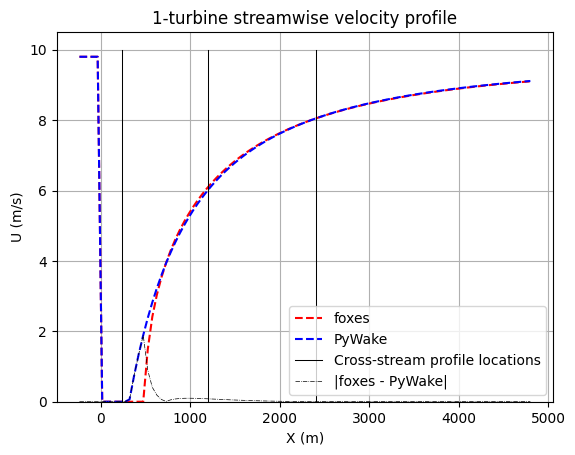

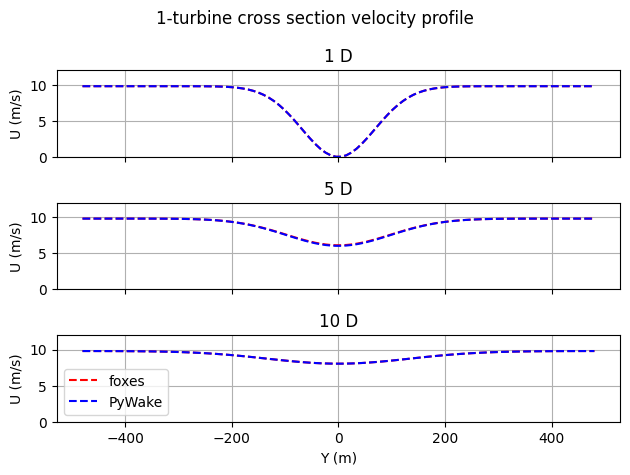

In [4]:
this_case = CASE_DIR / Path('bastankhah2014/wind_energy_system.yaml')
# floris_case = WCompFloris(this_case)  # Not implemented
foxes_case = WCompFoxes(this_case)
pywake_case = WCompPyWake(this_case)

fig, ax = plt.subplots()
# floris_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
pywake_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.plot([1*ROTOR_D, 1*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([5*ROTOR_D, 5*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([10*ROTOR_D, 10*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75, label="Cross-stream profile locations")
lines = ax.lines
x1, y1 = lines[0].get_data()
x2, y2 = lines[1].get_data()
e1 = np.abs(y1 - y2)
ax.plot(x1, e1, color="black", linestyle='-.', linewidth=0.5, label="|foxes - PyWake|")
ax.set_title("1-turbine streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('b2014 1t x.png'))

print("Error norm:")
print(np.linalg.norm(e1, ord=2))


fig, ax = plt.subplots(3, 1)
fig.suptitle("1-turbine cross section velocity profile")
X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    # floris_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    pywake_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()
fig.tight_layout()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('b2014 1t y.png'))

### Bastankhah / Porte Agel 2016

Experimental and theoretical study of wind turbine wakes in yawed conditions
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/experimental-and-theoretical-study-of-wind-turbine-wakes-in-yawed-conditions/400859134E38F340C8811FD7AAD0CE05

ky, kz are wake growth rates in the y and z directions
Eq 6.16 has parameters alpha and beta and below says that they are 0.58 and 0.077.
Equations 7.1 - 7.4 summarize the model but use parameters alpha_star and beta_star, which are 2.32 and 0.154.
These are related to alpha and beta by:
- alpha_star = 4 * alpha = 4 * 0.58 = 2.32
- beta_star = 2 * beta = 2 * 0.077 = 0.154

In the near wake, the distribution away from the wake centerline is given by 6.13.

Implemented in: foxes, PyWake

NOTE: k is set to 0.022 as mentioned in the last paragraph of section 4.

NOTE: FLORIS has ky and kz parameters, but foxes uses the same, k, for both.
This simplification is mentioned in the paper in section 7 Model Predictions.
For simplicity, FLORIS uses k for both ky and kz.

NOTE: FLORIS sets ky and kz in the deflection model based on Eq 15 from Niayifar / Porte Agel 2016 https://www.mdpi.com/1996-1073/9/9/741
ky = kz = ka * I + kb
ka = 0.3837
kb = 0.003678
Where as Bastankhah / Porte Agel 2016 sets ky and kz directly as in the velocity model.

Turbine 0, T0: windio_turbine
Error norm:
7.706554870684574


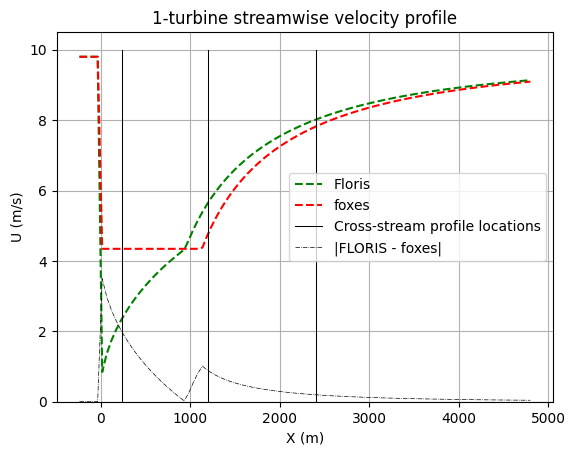

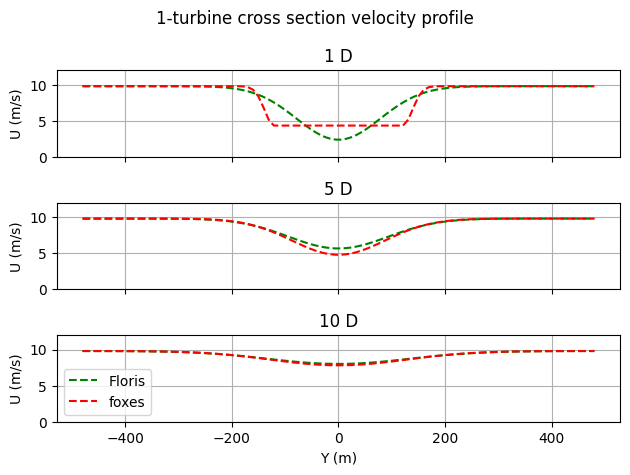

In [5]:
this_case = CASE_DIR / Path('bastankhah2016/wind_energy_system.yaml')
floris_case = WCompFloris(this_case)
foxes_case = WCompFoxes(this_case)
# pywake_case = WCompPyWake(this_case)

fig, ax = plt.subplots()
floris_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
# pywake_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.plot([1*ROTOR_D, 1*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([5*ROTOR_D, 5*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([10*ROTOR_D, 10*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75, label="Cross-stream profile locations")
lines = ax.lines
x1, y1 = lines[0].get_data()
x2, y2 = lines[1].get_data()
e1 = np.abs(y1 - y2)
ax.plot(x1, e1, color="black", linestyle='-.', linewidth=0.5, label="|FLORIS - foxes|")
ax.set_title("1-turbine streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('b2016 1t x.png'))

print("Error norm:")
print(np.linalg.norm(e1, ord=2))


fig, ax = plt.subplots(3, 1)
fig.suptitle("1-turbine cross section velocity profile")
X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    floris_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    # pywake_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()
fig.tight_layout()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('b2016 1t y.png'))

### TurbOPark

Modelling cluster wakes and wind farm blockage
https://iopscience.iop.org/article/10.1088/1742-6596/1618/6/062072

The only parameter is A with value = 0.04

Implemented in: FLORIS, foxes, PyWake, but FLORIS doesn't support plotting so it's excluded.

Turbine 0, T0: windio_turbine
Error norm:
0.0030529866567263583


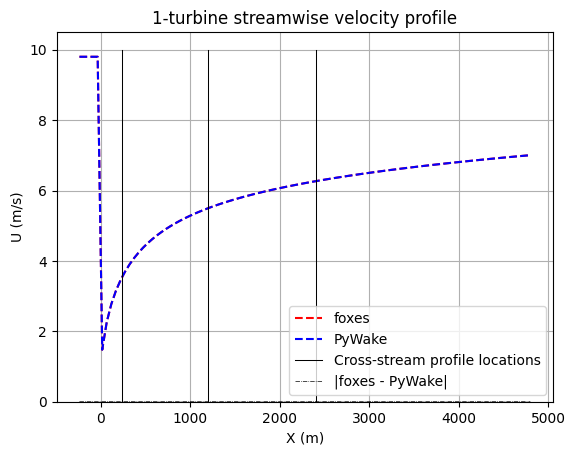

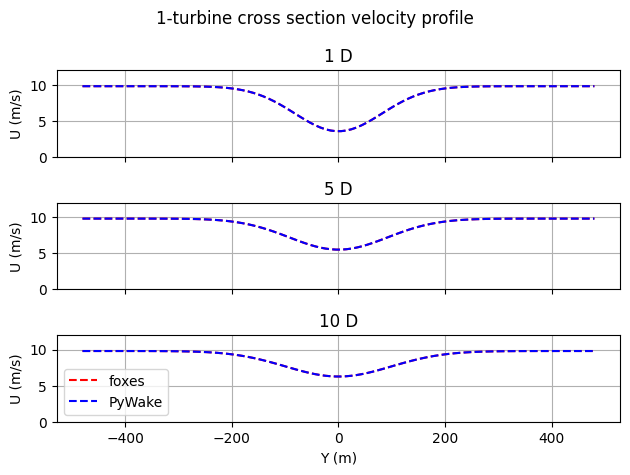

In [6]:
this_case = CASE_DIR / Path('turbopark/wind_energy_system.yaml')
# floris_case = WCompFloris(this_case)
foxes_case = WCompFoxes(this_case)
pywake_case = WCompPyWake(this_case)

fig, ax = plt.subplots()
# floris_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
pywake_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.plot([1*ROTOR_D, 1*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([5*ROTOR_D, 5*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([10*ROTOR_D, 10*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75, label="Cross-stream profile locations")
lines = ax.lines
x1, y1 = lines[0].get_data()
x2, y2 = lines[1].get_data()
e1 = np.abs(y1 - y2)
ax.plot(x1, e1, color="black", linestyle='-.', linewidth=0.5, label="|foxes - PyWake|")
ax.set_title("1-turbine streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('turbopark 1t x.png'))

print("Error norm:")
print(np.linalg.norm(e1, ord=2))


fig, ax = plt.subplots(3, 1)
fig.suptitle("1-turbine cross section velocity profile")
X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    # floris_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    pywake_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()
fig.tight_layout()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('turbopark 1t y.png'))

## Wake deflection models

Here we yaw the turbines 10 degrees to activate the wake deflection models.

### Jimenez

Application of a LES technique to characterize the wake deflection of a wind turbine in yaw
https://onlinelibrary.wiley.com/doi/10.1002/we.380

Using the Jensen velocity deficit model, we compare the Jimenez deflection models.

beta is the only parameter, and the paper suggest values between 0.9 and 0.125. We use 0.1.

NOTE: The FLORIS implementation does not correlate to the paper, and there are additional parameters.
ad, bd are default to 0 so that was left.
I've set kd to beta.

Implemented in: FLORIS and PyWake

Error norm:
0.004549359544058205


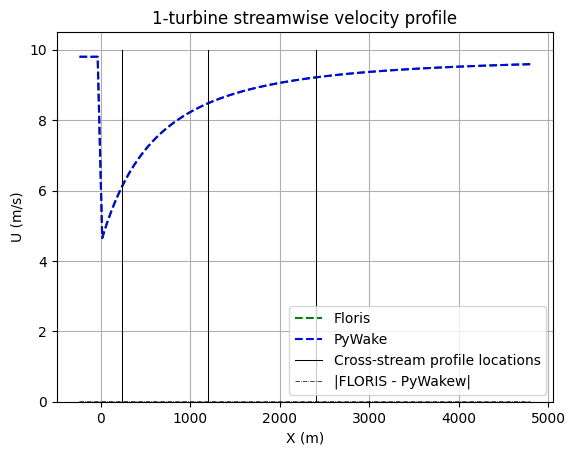

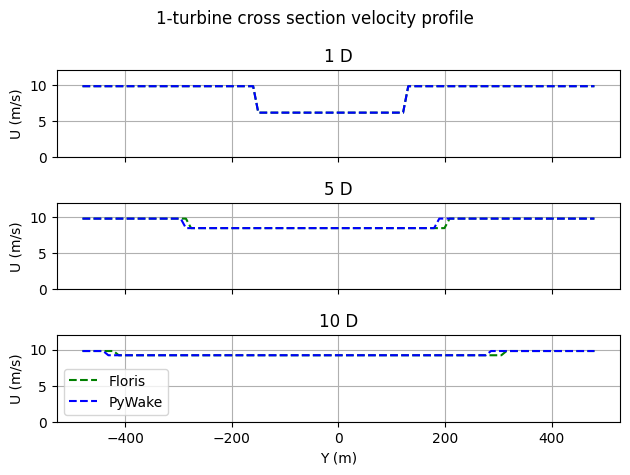

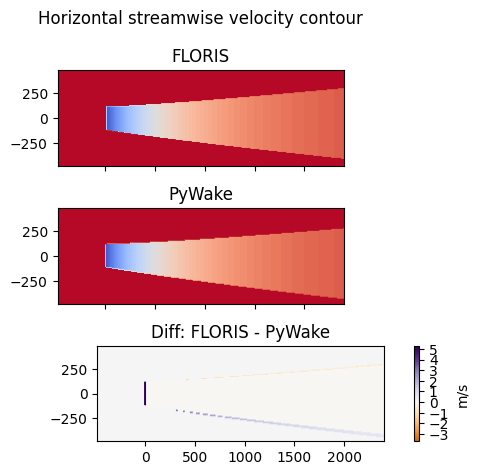

In [7]:
this_case = CASE_DIR / Path('jimenez/wind_energy_system.yaml')
floris_case = WCompFloris(this_case)
# foxes_case = WCompFoxes(this_case)
pywake_case = WCompPyWake(this_case)

fig, ax = plt.subplots()
floris_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
# foxes_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
pywake_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.plot([1*ROTOR_D, 1*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([5*ROTOR_D, 5*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([10*ROTOR_D, 10*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75, label="Cross-stream profile locations")
lines = ax.lines
x1, y1 = lines[0].get_data()
x2, y2 = lines[1].get_data()
e1 = np.abs(y1 - y2)
ax.plot(x1, e1, color="black", linestyle='-.', linewidth=0.5, label="|FLORIS - PyWakew|")
ax.set_title("1-turbine streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('jimenez 1t x.png'))

print("Error norm:")
print(np.linalg.norm(e1, ord=2))


fig, ax = plt.subplots(3, 1)
fig.suptitle("1-turbine cross section velocity profile")
X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    floris_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    # foxes_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    pywake_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()
fig.tight_layout()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('jimenez 1t y.png'))

fig, ax = plt.subplots(3, 1)
fig.suptitle("Horizontal streamwise velocity contour")

plt.axes(ax[0])
ax[0].xaxis.set_ticklabels([])
floris_plane = floris_case.horizontal_contour(wind_direction=270)
ax[0].set_title("FLORIS")

# plt.axes(ax[1])
# ax[1].xaxis.set_ticklabels([])
# # foxes_plane = foxes_case.horizontal_contour(wind_direction=270)

plt.axes(ax[1])
ax[1].xaxis.set_ticklabels([])
pywake_plane = pywake_case.horizontal_contour(wind_direction=270)
ax[1].set_title("PyWake")

# fig, ax = plt.subplots(2, 1)
# fig, ax = plt.subplots(1, 1); ax=[ax]
# fig.suptitle("FLORIS - PyWake")

plt.axes(ax[2])
diff = floris_plane - pywake_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax[2],
    min_speed=min_speed,
    max_speed=max_speed,
    cmap='PuOr',
    clevels=100,
    color_bar=True,
    title="Diff: FLORIS - PyWake"
)

# plt.axes(ax[1])
# diff = floris_plane - foxes_plane
# abs_diff = np.abs(diff.values)
# min_speed = -1 * np.max(abs_diff)
# max_speed = np.max(abs_diff)
# plot_plane(
#     diff,
#     ax=ax[1],
#     min_speed=min_speed,
#     max_speed=max_speed,
#     cmap='PuOr',
#     clevels=100,
#     color_bar=True,
#     title="FLORIS - foxes"
# )

fig.tight_layout()

### Bastankhah / Porte Agel 2016

Experimental and theoretical study of wind turbine wakes in yawed conditions
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/experimental-and-theoretical-study-of-wind-turbine-wakes-in-yawed-conditions/400859134E38F340C8811FD7AAD0CE05

ky, kz are wake growth rates in the y and z directions
Eq 6.16 has parameters alpha and beta and below says that they are 0.58 and 0.077.
Equations 7.1 - 7.4 summarize the model but use parameters alpha_star and beta_star, which are 2.32 and 0.154.
These are related to alpha and beta by:
- alpha_star = 4 * alpha = 4 * 0.58 = 2.32
- beta_star = 2 * beta = 2 * 0.077 = 0.154

In the near wake, the distribution away from the wake centerline is given by 6.13.

Implemented in: FLORIS, foxes
PyWake implements the velocity model, but not the deflection model.

NOTE: k is set to 0.022 as mentioned in the last paragraph of section 4.

NOTE: FLORIS sets ky and kz in the deflection model based on Eq 15 from Niayifar / Porte Agel 2016 https://www.mdpi.com/1996-1073/9/9/741
ky = kz = ka * I + kb
ka = 0.3837
kb = 0.003678
Where as Bastankhah / Porte Agel 2016 sets ky and kz directly as in the velocity model.


Turbine 0, T0: windio_turbine
Error norm:
6.442284281720595


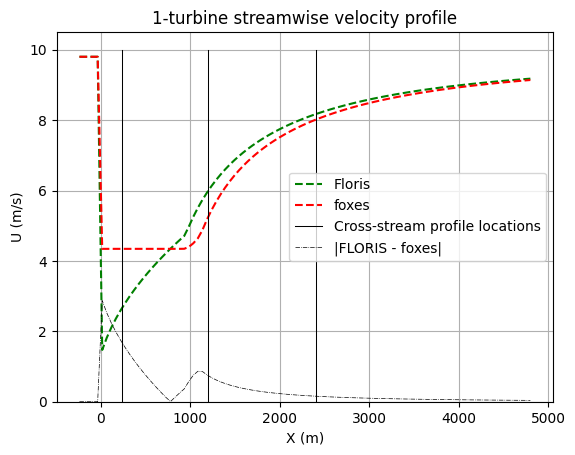

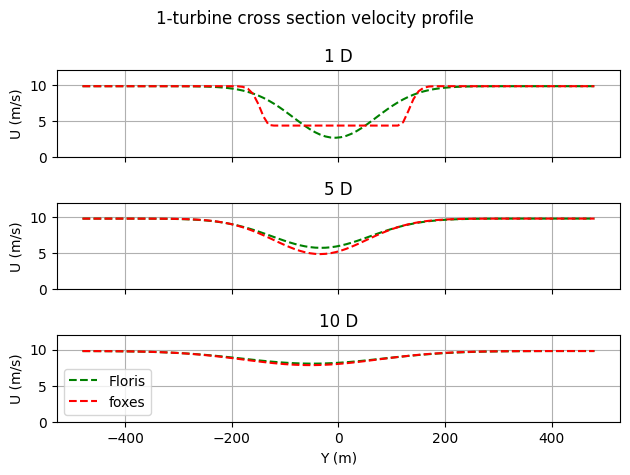

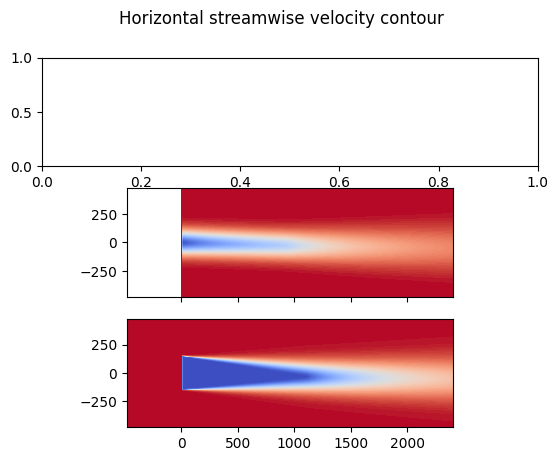

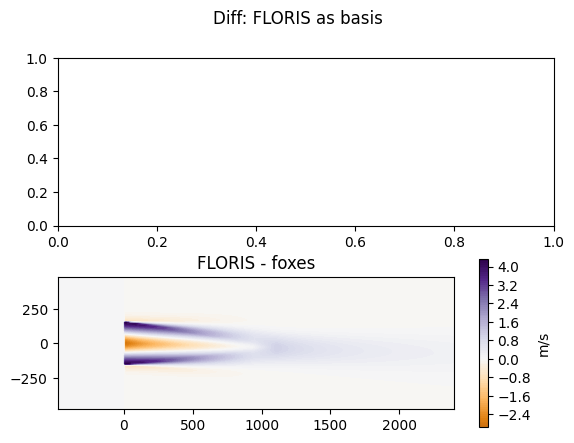

In [8]:
this_case = CASE_DIR / Path('bastankhah2016_deflection/wind_energy_system.yaml')
floris_case = WCompFloris(this_case)
foxes_case = WCompFoxes(this_case)
# pywake_case = WCompPyWake(this_case)

fig, ax = plt.subplots()
floris_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
# pywake_case.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.plot([1*ROTOR_D, 1*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([5*ROTOR_D, 5*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([10*ROTOR_D, 10*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75, label="Cross-stream profile locations")
lines = ax.lines
x1, y1 = lines[0].get_data()
x2, y2 = lines[1].get_data()
e1 = np.abs(y1 - y2)
ax.plot(x1, e1, color="black", linestyle='-.', linewidth=0.5, label="|FLORIS - foxes|")
ax.set_title("1-turbine streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('b2016 deflection 1t x.png'))

print("Error norm:")
print(np.linalg.norm(e1, ord=2))


fig, ax = plt.subplots(3, 1)
fig.suptitle("1-turbine cross section velocity profile")
X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    floris_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    # pywake_case.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()
fig.tight_layout()
if SAVE_FIGS: fig.savefig(SAVE_PATH / Path('b2016 deflection 1t y.png'))

fig, ax = plt.subplots(3, 1)
fig.suptitle("Horizontal streamwise velocity contour")

plt.axes(ax[0])
# ax[0].xaxis.set_ticklabels([])
# pywake_plane = pywake_case.horizontal_contour(wind_direction=270)

plt.axes(ax[1])
ax[1].xaxis.set_ticklabels([])
floris_plane = floris_case.horizontal_contour(wind_direction=270)

plt.axes(ax[2])
ax[1].xaxis.set_ticklabels([])
foxes_plane = foxes_case.horizontal_contour(wind_direction=270)


fig, ax = plt.subplots(2, 1)
fig.suptitle("Diff: FLORIS as basis")

plt.axes(ax[0])
# diff = floris_plane - pywake_plane
# abs_diff = np.abs(diff.values)
# min_speed = -1 * np.max(abs_diff)
# max_speed = np.max(abs_diff)
# plot_plane(
#     diff,
#     ax=ax[0],
#     min_speed=min_speed,
#     max_speed=max_speed,
#     cmap='PuOr',
#     clevels=100,
#     color_bar=True,
#     title="FLORIS - PyWake"
# )

plt.axes(ax[1])
diff = floris_plane - foxes_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax[1],
    min_speed=min_speed,
    max_speed=max_speed,
    cmap='PuOr',
    clevels=100,
    color_bar=True,
    title="FLORIS - foxes"
)

## Bonus - Bastankhah 2014 vs Bastankhah 2016 in foxes

Turbine 0, T0: windio_turbine
Turbine 0, T0: windio_turbine


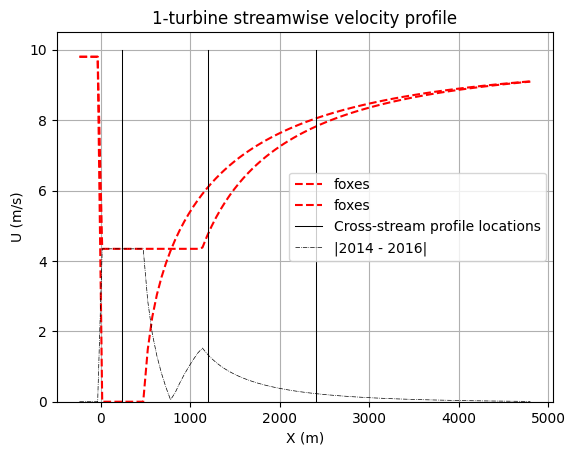

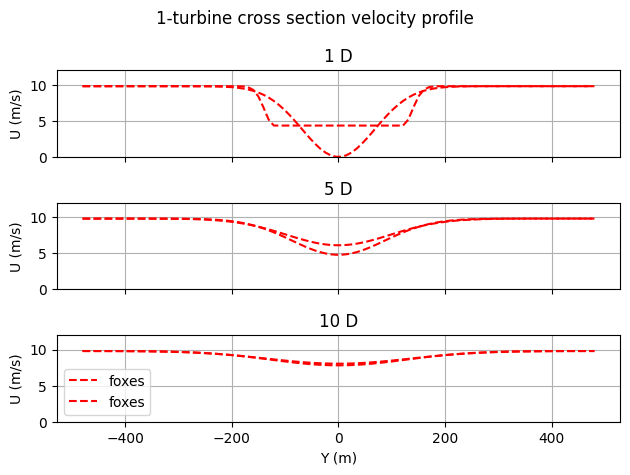

In [9]:
this_case = CASE_DIR / Path('bastankhah2014/wind_energy_system.yaml')
foxes_b2014 = WCompFoxes(this_case)
this_case = CASE_DIR / Path('bastankhah2016/wind_energy_system.yaml')
foxes_b2016 = WCompFoxes(this_case)

fig, ax = plt.subplots()
foxes_b2014.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_b2016.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.plot([1*ROTOR_D, 1*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([5*ROTOR_D, 5*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75)
ax.plot([10*ROTOR_D, 10*ROTOR_D], [0, 10], color="black", linestyle='-', linewidth=0.75, label="Cross-stream profile locations")
lines = ax.lines
x1, y1 = lines[0].get_data()
x2, y2 = lines[1].get_data()
e1 = np.abs(y1 - y2)
emax = np.max([np.max(e1), np.max(e2)])
ax.plot(x1, e1, color="black", linestyle='-.', linewidth=0.5, label="|2014 - 2016|")
ax.set_title("1-turbine streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()


fig, ax = plt.subplots(3, 1)
fig.suptitle("1-turbine cross section velocity profile")
X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    foxes_b2014.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_b2016.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()
fig.tight_layout()